In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import copy
from Genetic_Algorithm import GA

In [37]:
# Read dataset
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [39]:
# Find number of label
iris = iris.sample(frac = 1)
iris['Species'].unique()

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [40]:
# Changing labels to numerical values
iris = iris.replace('Iris-virginica', 0)
iris = iris.replace('Iris-versicolor', 1)
iris = iris.replace('Iris-setosa', 2)

In [41]:
x = iris.iloc[:, iris.columns != 'Species'].drop('Id', axis=1)
y = iris.iloc[:, iris.columns == 'Species']
print(len(y[y['Species']==0]), len(y[y['Species']==1]), len(y[y['Species']==2]))


50 50 50


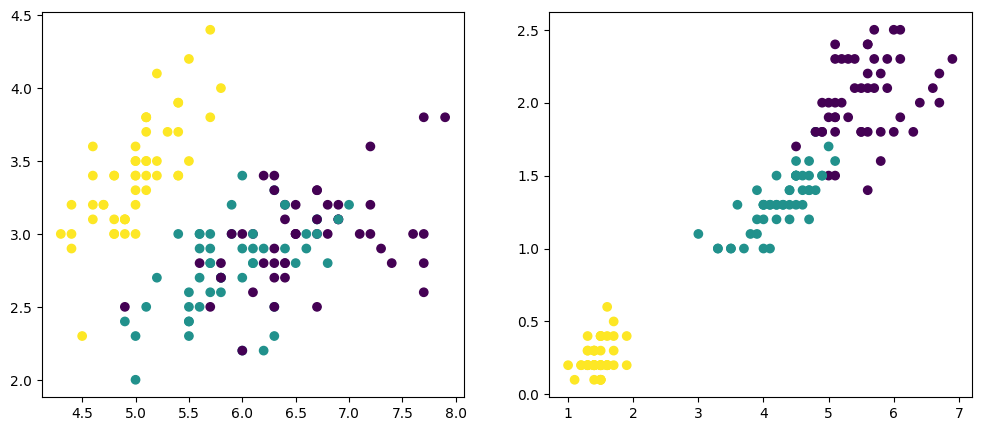

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=y['Species'])
ax[1].scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c=y['Species'])

In [43]:
# Normalizing data
x = StandardScaler().fit_transform(x)
y = np.squeeze(y)

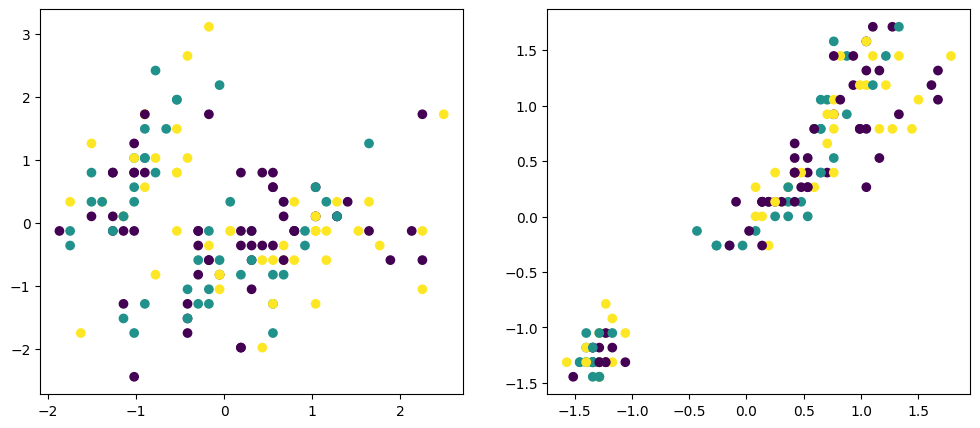

In [44]:
# Population
# Number of chromosomes
c_n = 30
# Number of data points
n = 150
# Number of parrents
p_n = 16
chromosomes = np.random.randint(0,3,size=(c_n, n+1))
for i in range(c_n):
    chromosomes[i][n] = 3   

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x.T[0], x.T[1], c=chromosomes[0][0:n])
ax[1].scatter(x.T[2], x.T[3], c=chromosomes[0][0:n])

In [45]:
genetic_algo = GA(iris, chromosomes, n, c_n, p_n)
t = 100
for i in range(t):
    genetic_algo.parrent_choosing()
    genetic_algo.cross_over(30)
    genetic_algo.mutation(x)
    genetic_algo.next_generation_choosing(x, y)
    
pred = genetic_algo.winner(x, y)[0][0:n]

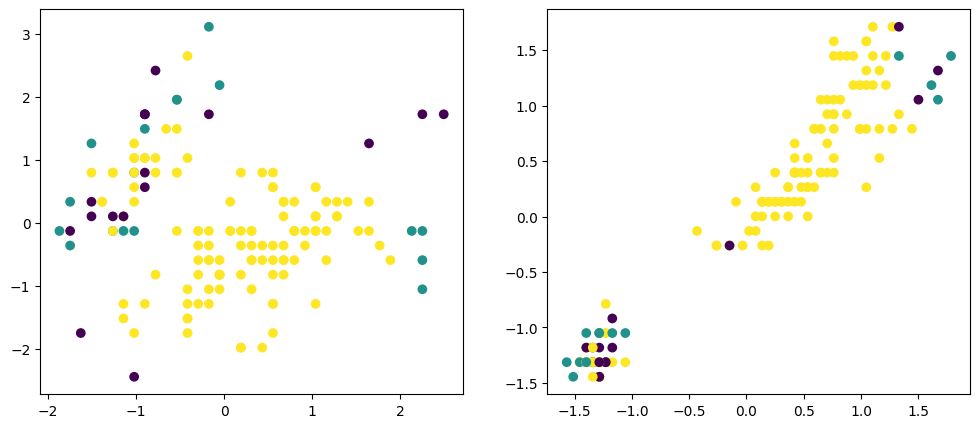

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x.T[0], x.T[1], c=pred)
ax[1].scatter(x.T[2], x.T[3], c=pred)